#**Business tangent: What problem/ goal we are trying to solve/ achieve**

1. Providing advice to buyers, retirees, and investors and helping them locate the best investment opportunities.

2. Providing information to investors about pre-leased properties that have the potential for capital growth as well as long-term security.


***Story Telling:***
House price predictions are consistently showing an upward trend when compared to actual listing prices. In summary, investing in real estate proves to be a reliable asset, with annual increases in house prices ensuring profitability. Likewise, individuals are drawn to real estate investments due to the annual growth in house prices and rental income.

***Where should an investor invest? What houses would you recommend they buy as an investment property?***

A project to predict home prices serves a valuable commercial purpose by meeting the demands of real estate agencies, investors, and homeowners involved in real estate transactions in a particular area.

The ability of real estate companies' agents to assess the market value of properties in various geographic areas is made possible by this predictive model. This model can be used by real estate investors to identify areas with high potential for capital growth or rental income. The model provides a trustworthy way to determine property values for homeowners looking to sell or rent their homes.

Furthermore, by analyzing correlations between different property features and home prices, the model equips stakeholders to make knowledgeable, data-driven decisions about real estate investments. For instance, it may reveal trends that indicate certain neighborhoods tend to value homes with higher rent_zestimate scores higher. This useful data enables real estate firms to pinpoint areas where rent_zestimate is in high demand, potentially driving up property values.

In a nutshell the project to predict house prices proves to be a vital tool for the real estate industry, providing insightful perspectives and assisting wise decision-making based on data-driven analysis.


## Setting things up


###Importing Libraries

In [1]:
!pip install -qU graphviz

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import (classification_report, accuracy_score, f1_score,
                             precision_score, recall_score, cohen_kappa_score,
                             confusion_matrix, roc_auc_score, roc_curve,
                             precision_recall_curve, explained_variance_score
                             )

from sklearn.metrics import r2_score, mean_squared_error

import pydotplus
from IPython.display import Image

import statsmodels
import statsmodels.api as sm

from collections import Counter

import pydotplus
from sklearn.tree import export_graphviz

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 1. Loading Data and display



In [4]:
link1 = 'https://drive.google.com/file/d/1H9Y-eUHxbbq0MmRg8p0Nyr8dz5BIE7iW/view?usp=drive_link'
link2 = 'https://drive.google.com/file/d/1AN-iFmQM7K-03fvxMjvLRTA5qwIdrsaY/view?usp=drive_link'

for i, link in enumerate([link1, link2], 1):
  id = link.split("/")[-2]
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile(f'Realestate{i}.csv')

In [5]:
data1 = pd.read_csv('Realestate1.csv')
data2 = pd.read_csv('Realestate2.csv')
data1.shape, data2.shape

((2092, 22), (800, 22))

In [6]:
data1.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,27,15389006,"1787 Oceanaire Ct, San Luis Obispo, CA 93405",35.257103,-120.684715,999000,USD,2.000000,4.000000,1902 sqft,NaN,1001400.000000,3658.000000,16.000000,NaN,False,https://photos.zillowstatic.com/fp/16f9c2f13b7...,House for sale,California Coastal Real Estate,"https://www.zillow.com/homes/San-Luis-Obispo,-...",https://www.zillow.com/homedetails/1787-Oceana...,"https://www.zillow.com/homes/San-Luis-Obispo,-..."
1,215,19825038,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000,USD,2.000000,4.000000,1501 sqft,NaN,1226500.000000,4164.000000,23.000000,NaN,False,https://photos.zillowstatic.com/fp/408bf6f7ffd...,House for sale,NaN,"https://www.zillow.com/homes/San-Jose,-CA_rb/",https://www.zillow.com/homedetails/5364-Federa...,https://www.zillow.com/san-jose-ca/6_p/
2,463,16842518,"4085 Caminito Terviso, San Diego, CA 92122",32.857420,-117.225050,1950000,USD,3.000000,4.000000,2434 sqft,NaN,1904800.000000,6287.000000,37.000000,NaN,False,https://photos.zillowstatic.com/fp/be5c13c8ce8...,House for sale,HomeSmart Realty West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4085-Camini...,https://www.zillow.com/san-diego-ca/12_p/
3,474,16989893,"6871 Alvarado Rd UNIT 10, San Diego, CA 92120",32.775852,-117.051080,549000,USD,3.000000,3.000000,1445 sqft,NaN,557500.000000,3499.000000,3.000000,NaN,False,https://photos.zillowstatic.com/fp/289ed35fa44...,Townhouse for sale,Keller Williams SD Signature,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/6871-Alvara...,https://www.zillow.com/san-diego-ca/12_p/
4,104,16923201,"3470 Bayside Walk, San Diego, CA 92109",32.777897,-117.251890,7395000,USD,5.000000,5.000000,4295 sqft,NaN,7110600.000000,24069.000000,NaN,NaN,False,https://photos.zillowstatic.com/fp/eb37c7717f2...,House for sale,"eXp Realty of California, Inc.","https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/3470-Baysid...,https://www.zillow.com/san-diego-ca/3_p/


In [7]:
data2.head()

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,552,66658813,"7120 Shoreline Dr UNIT 2314, San Diego, CA 92122",32.863552,-117.200420,686686.000000,USD,2.000000,2.000000,848.0 sqft,NaN,686700.000000,3200.000000,NaN,NaN,False,https://photos.zillowstatic.com/fp/95d998adcf5...,Coming soon,Century 21 Award,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/7120-Shorel...,https://www.zillow.com/san-diego-ca/14_p/
1,609,16951136,"4324 Randolph St, San Diego, CA 92103",32.757050,-117.176990,3695000.000000,USD,5.000000,5.000000,3610.0 sqft,NaN,NaN,NaN,NaN,NaN,False,https://photos.zillowstatic.com/fp/829395674bb...,House for sale,Compass,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4324-Randol...,https://www.zillow.com/san-diego-ca/16_p/
2,645,333879500,"4234 4th Ave, San Diego, CA 92103",32.754467,-117.161680,1299900.000000,USD,3.000000,3.000000,2104.0 sqft,NaN,1299902.000000,5088.000000,NaN,NaN,False,https://photos.zillowstatic.com/fp/1cf01a326c3...,Townhouse for sale,Coldwell Banker West,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/4234-4th-Av...,https://www.zillow.com/san-diego-ca/17_p/
3,384,82937659,"2003 Bayview Heights Dr SPACE 196, San Diego, ...",32.728695,-117.069626,349000.000000,USD,2.000000,3.000000,1427.0 sqft,NaN,356693.000000,3594.000000,60.000000,NaN,False,https://photos.zillowstatic.com/fp/b6ba35c6679...,Home for sale,Real Estate People,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/2003-Bayvie...,https://www.zillow.com/san-diego-ca/10_p/
4,646,16854758,"6204 Beaumont Ave, La Jolla, CA 92037",32.823605,-117.274055,4875000.000000,USD,4.000000,5.000000,3327.0 sqft,NaN,4710674.000000,18430.000000,57.000000,NaN,False,https://photos.zillowstatic.com/fp/cb1282a5622...,House for sale,Compass,"https://www.zillow.com/homes/San-Diego,-CA_rb/",https://www.zillow.com/homedetails/6204-Beaumo...,https://www.zillow.com/san-diego-ca/17_p/


# 2. Data Preparation

## 1st Dataset

### EDA

In [8]:
data1.dtypes

rank                 int64
property_id          int64
address             object
latitude           float64
longitude          float64
price                int64
currency            object
bathrooms          float64
bedrooms           float64
area                object
land_area           object
zestimate          float64
rent_zestimate     float64
days_on_zillow     float64
sold_date          float64
is_zillow_owned       bool
image               object
listing_type        object
broker_name         object
input               object
property_url        object
listing_url         object
dtype: object

In [9]:
data1.describe()

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,2092.000000,2092.000000,2091.000000,2091.000000,2092.000000,1978.000000,1980.000000,1781.000000,1977.000000,1491.000000,0.000000
mean,285.926864,423107075.007648,34.421147,-118.818188,1872178.564532,2.910516,3.246465,1797864.963504,5864.015680,40.146881,NaN
std,221.742462,778057930.939296,1.931455,2.088772,2601945.130376,1.626656,1.509566,2480477.134397,7148.857192,63.571979,NaN
min,1.000000,15384744.000000,32.547880,-122.027950,0.000000,1.000000,0.000000,124200.000000,346.000000,0.000000,NaN
25%,89.000000,17009178.000000,32.824938,-121.807440,800000.000000,2.000000,2.000000,805300.000000,3399.000000,7.000000,NaN
50%,240.000000,25553893.500000,33.560585,-117.710310,1249000.000000,3.000000,3.000000,1196100.000000,4250.000000,18.000000,NaN
75%,453.250000,153365954.000000,37.258185,-117.181790,1950000.000000,3.000000,4.000000,1905000.000000,5846.000000,47.000000,NaN
max,820.000000,2140706315.000000,37.427307,-116.990800,38000000.000000,26.000000,28.000000,41989700.000000,116332.000000,735.000000,NaN


In [10]:
data1.isnull().sum()

rank                  0
property_id           0
address               0
latitude              1
longitude             1
price                 0
currency              0
bathrooms           114
bedrooms            112
area                 67
land_area          2031
zestimate           311
rent_zestimate      115
days_on_zillow      601
sold_date          2092
is_zillow_owned       0
image                 0
listing_type          0
broker_name         755
input                 0
property_url          0
listing_url           0
dtype: int64

### Data Cleaning

In [11]:
# drop unwanted columns
cols_to_drop = ['sold_date', 'land_area', 'currency', 'is_zillow_owned', 'image',
              'listing_type', 'broker_name', 'input',	'property_url',	'listing_url']
data1.drop(columns=cols_to_drop, inplace=True)

# filling missing values
cols_to_fill = ['latitude','longitude','price','bathrooms','bedrooms','area',
                'zestimate','rent_zestimate', 'days_on_zillow']
data1.dropna(subset=cols_to_fill, inplace=True)

data1.shape

(1208, 12)

In [12]:
data1.isnull().sum().sum()

0

In [13]:
data1['area'] = (data1.area.str.rsplit(' ', expand = True)[0]).astype(float)
data1.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow
0,27,15389006,"1787 Oceanaire Ct, San Luis Obispo, CA 93405",35.257103,-120.684715,999000,2.000000,4.000000,1902.000000,1001400.000000,3658.000000,16.000000
1,215,19825038,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000,2.000000,4.000000,1501.000000,1226500.000000,4164.000000,23.000000
2,463,16842518,"4085 Caminito Terviso, San Diego, CA 92122",32.857420,-117.225050,1950000,3.000000,4.000000,2434.000000,1904800.000000,6287.000000,37.000000
3,474,16989893,"6871 Alvarado Rd UNIT 10, San Diego, CA 92120",32.775852,-117.051080,549000,3.000000,3.000000,1445.000000,557500.000000,3499.000000,3.000000
9,245,59683322,"1730 Cambria Ct, San Jose, CA 95124",37.253390,-121.912270,1848000,3.000000,4.000000,2467.000000,1792100.000000,5950.000000,37.000000


### Plotting and Correlation

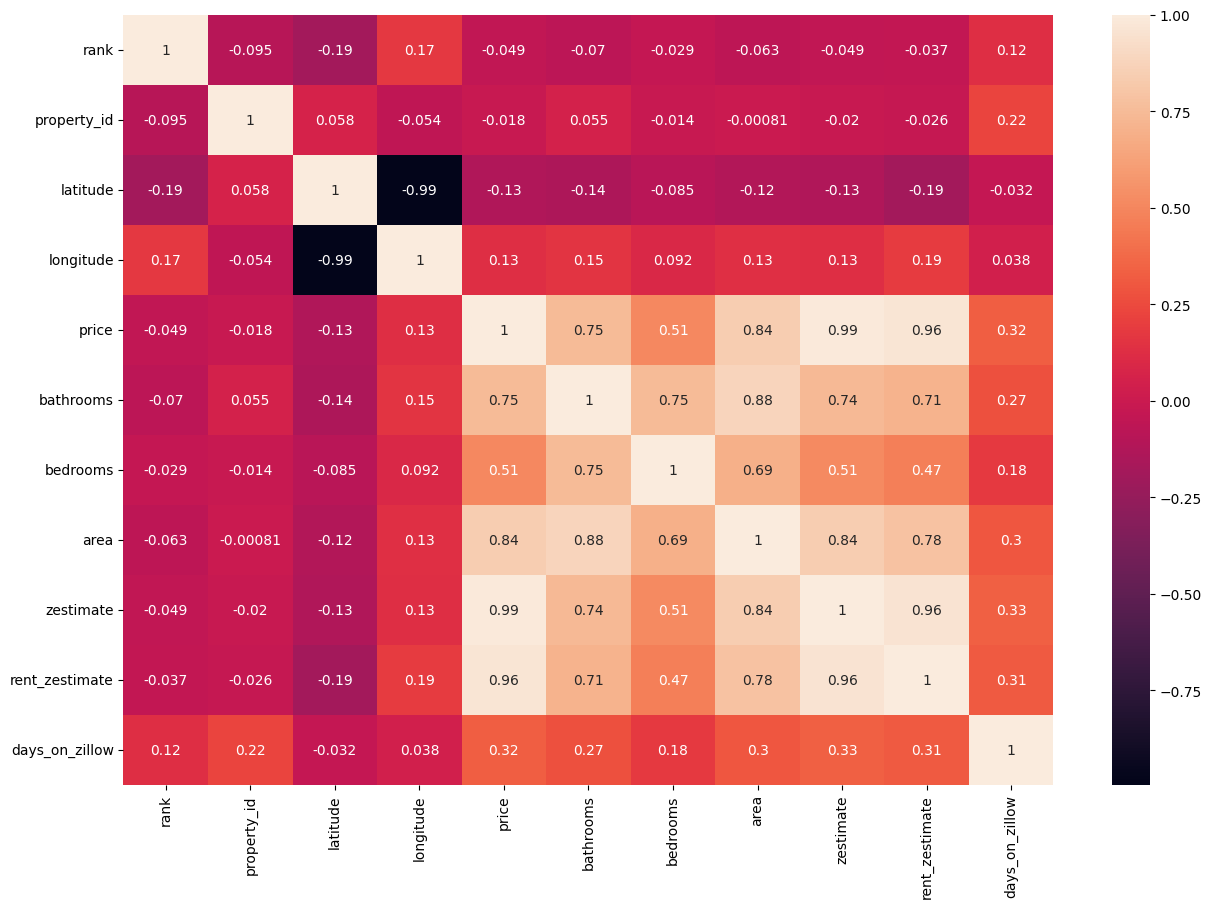

In [14]:
fig,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,color = 'r')
plt.show()

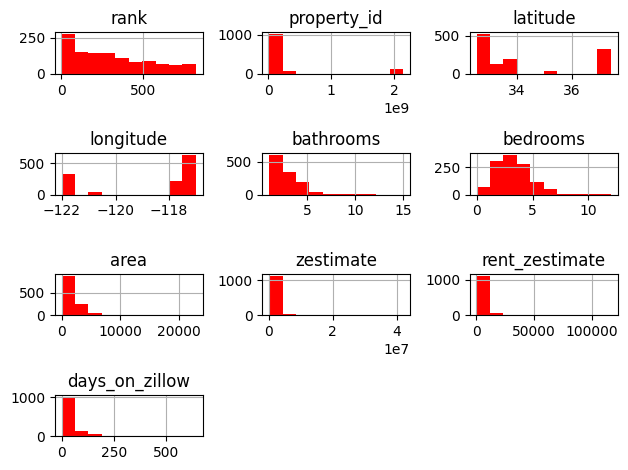

Skewness:


rank              0.527570
property_id       2.659053
latitude          0.859244
longitude        -0.858817
bathrooms         2.369171
bedrooms          1.352005
area              4.850583
zestimate         7.245021
rent_zestimate    7.241462
days_on_zillow    4.248037
dtype: float64

In [15]:
data1.drop('price', axis = 1).hist(color = "r")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

data1.drop('price', axis = 1).skew()

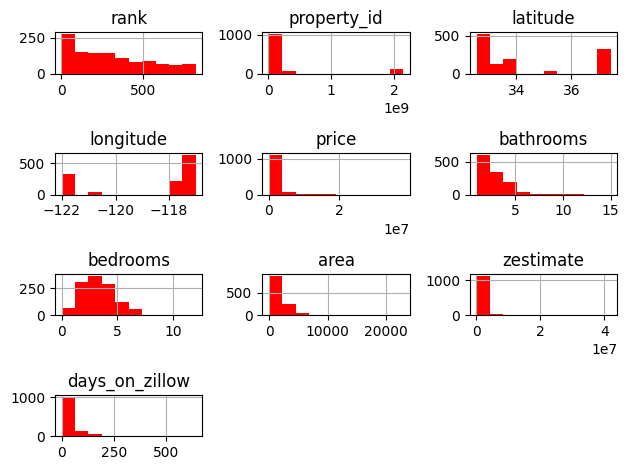

Skewness:


rank              0.527570
property_id       2.659053
latitude          0.859244
longitude        -0.858817
price             6.950294
bathrooms         2.369171
bedrooms          1.352005
area              4.850583
zestimate         7.245021
days_on_zillow    4.248037
dtype: float64

In [16]:
data1.drop('rent_zestimate', axis = 1).hist(color = "r")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

data1.drop('rent_zestimate', axis = 1).skew()

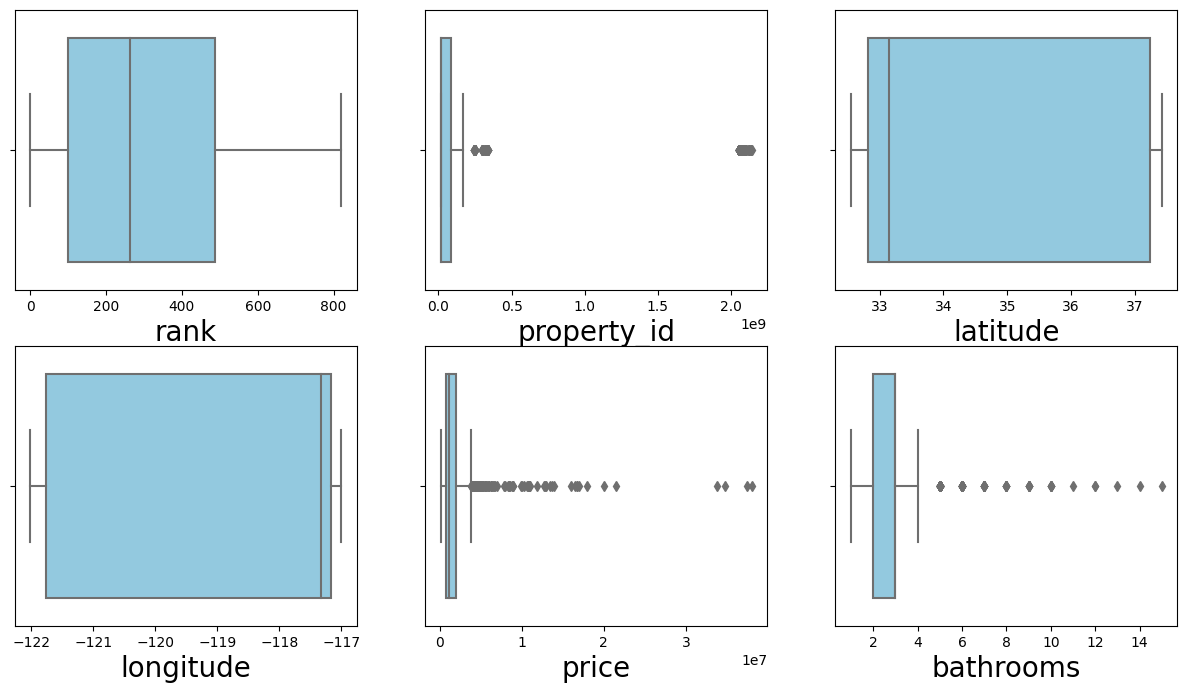

In [17]:
df_num = data1.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x=df_num[variable], orient="h", whis=1.5, ax=subplot, color='skyblue') # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

The above box plot shows that 'price','bathrooms','property_id' has outliers and are right skewed with mean finely skewed too.

## 2nd Dataset

### EDA

In [18]:
data2.dtypes

rank                 int64
property_id          int64
address             object
latitude           float64
longitude          float64
price              float64
currency            object
bathrooms          float64
bedrooms           float64
area                object
land_area           object
zestimate          float64
rent_zestimate     float64
days_on_zillow     float64
sold_date          float64
is_zillow_owned       bool
image               object
listing_type        object
broker_name         object
input               object
property_url        object
listing_url         object
dtype: object

In [19]:
data2.describe()

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow,sold_date
count,800.000000,800.000000,784.000000,784.000000,800.000000,784.000000,785.000000,688.000000,716.000000,307.000000,0.000000
mean,400.500000,216625344.682500,32.806652,-117.149516,1669012.943750,2.636480,3.138854,1607851.332849,5920.114525,43.244300,NaN
std,231.084400,559712503.436029,0.108673,0.070501,2859586.143061,1.425635,1.419554,2750500.015329,7572.505061,68.105135,NaN
min,1.000000,16735326.000000,32.559610,-117.281620,0.000000,1.000000,0.000000,121700.000000,1614.000000,1.000000,NaN
25%,200.750000,16908057.250000,32.731734,-117.209362,675000.000000,2.000000,2.000000,669096.000000,3200.000000,8.000000,NaN
50%,400.500000,17067746.000000,32.793905,-117.151320,957500.000000,2.000000,3.000000,948903.500000,3997.000000,20.000000,NaN
75%,600.250000,70597465.000000,32.861627,-117.087836,1700000.000000,3.000000,4.000000,1703607.000000,5942.500000,46.500000,NaN
max,800.000000,2125221955.000000,33.053795,-117.006256,49000000.000000,14.000000,10.000000,48319800.000000,143732.000000,625.000000,NaN


In [20]:
data2.isnull().sum()

rank                 0
property_id          0
address              0
latitude            16
longitude           16
price                0
currency             0
bathrooms           16
bedrooms            15
area                17
land_area          793
zestimate          112
rent_zestimate      84
days_on_zillow     493
sold_date          800
is_zillow_owned      0
image                0
listing_type         0
broker_name         22
input                0
property_url         0
listing_url          0
dtype: int64

### Data Cleaning

In [21]:
# drop unwanted columns
data2.drop(columns=cols_to_drop, inplace=True)

# filling missing values
data2.dropna(subset=cols_to_fill, inplace=True)

data2.shape

(247, 12)

In [22]:
data2.isnull().sum().sum()

0

In [23]:
data2.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow
3,384,82937659,"2003 Bayview Heights Dr SPACE 196, San Diego, ...",32.728695,-117.069626,349000.000000,2.000000,3.000000,1427.0 sqft,356693.000000,3594.000000,60.000000
4,646,16854758,"6204 Beaumont Ave, La Jolla, CA 92037",32.823605,-117.274055,4875000.000000,4.000000,5.000000,3327.0 sqft,4710674.000000,18430.000000,57.000000
9,709,17165430,"3434 Del Sol Blvd APT J, San Diego, CA 92154",32.573795,-117.059420,599000.000000,2.000000,4.000000,1206.0 sqft,610500.000000,3158.000000,9.000000
14,425,67712358,"2064 Kettner Blvd APT 38, San Diego, CA 92101",32.725765,-117.170296,689000.000000,1.000000,1.000000,625.0 sqft,689006.000000,2623.000000,59.000000
15,447,65398478,"525 Marine St UNIT 12, La Jolla, CA 92037",32.837280,-117.277740,1650000.000000,2.000000,3.000000,1336.0 sqft,1650010.000000,7925.000000,4.000000


### Plotting and Correlation

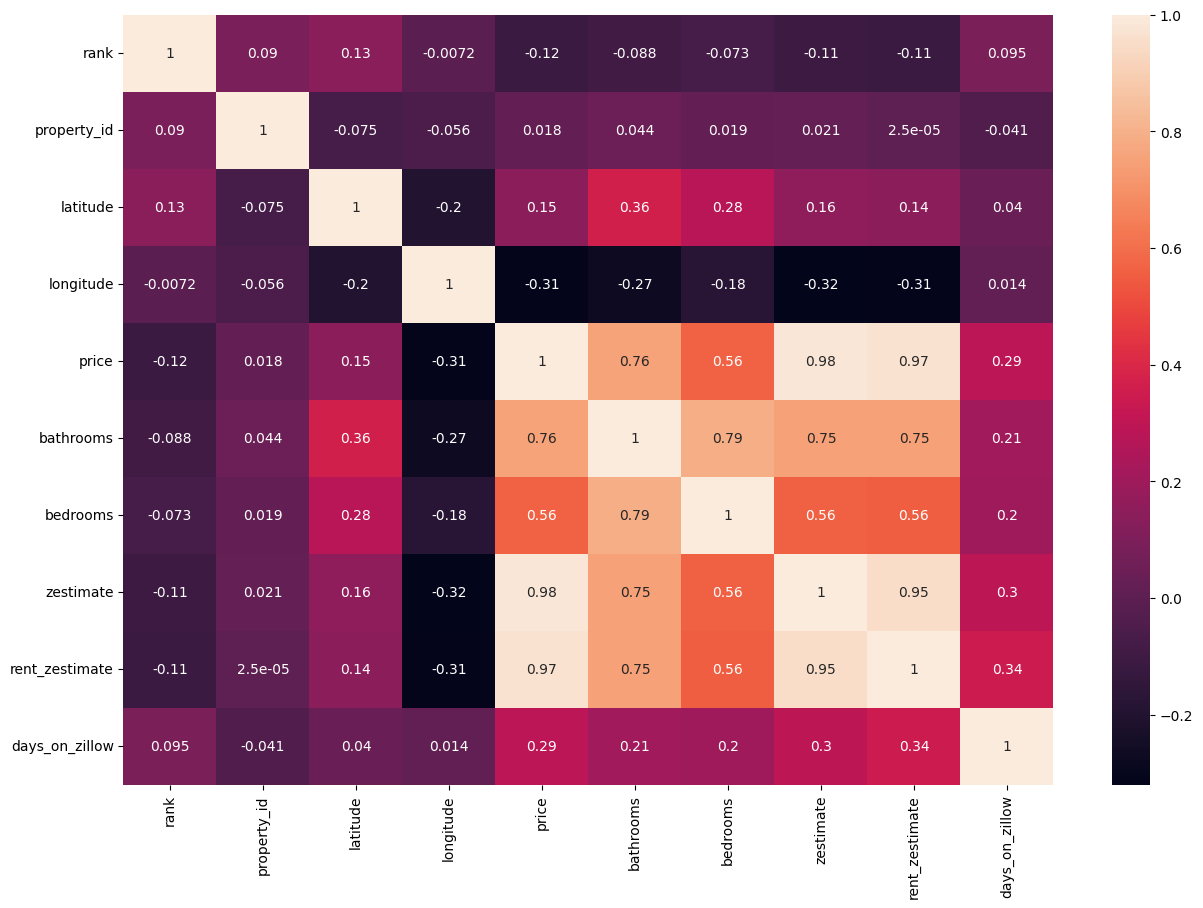

In [24]:
fig,axes = plt.subplots(figsize = (15,10))
sns.heatmap(data2.corr(), annot=True, color = 'b')
plt.show()

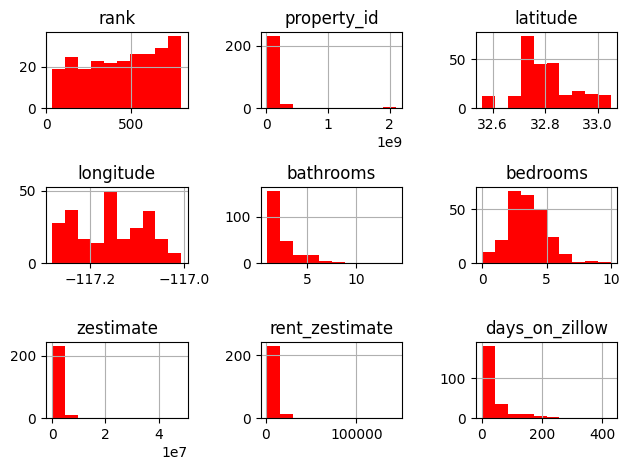

Skewness:


rank             -0.187851
property_id       7.093354
latitude          0.341245
longitude         0.028751
bathrooms         2.566788
bedrooms          0.669442
zestimate         8.365217
rent_zestimate    8.731539
days_on_zillow    2.996180
dtype: float64

In [25]:
data2.drop('price', axis = 1).hist(color = "r")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

data2.drop('price', axis = 1).skew()

While most of the columns right skewed, 'rank', 'longitude', 'latitude' are almost normally distributed.

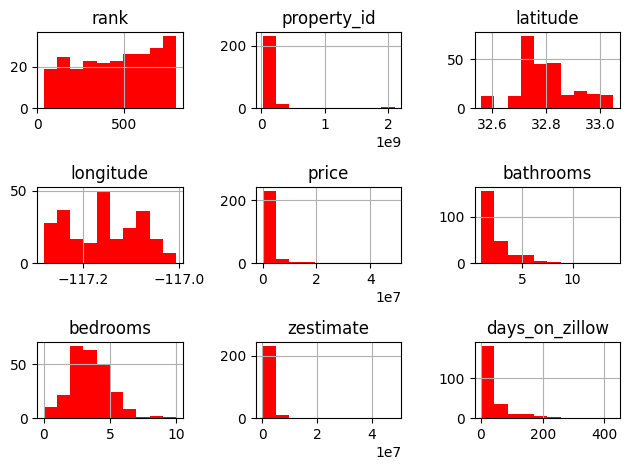

Skewness:


rank             -0.187851
property_id       7.093354
latitude          0.341245
longitude         0.028751
price             7.837806
bathrooms         2.566788
bedrooms          0.669442
zestimate         8.365217
days_on_zillow    2.996180
dtype: float64

In [26]:
data2.drop('rent_zestimate', axis = 1).hist(color = "r")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()
print('Skewness:')

data2.drop('rent_zestimate', axis = 1).skew()

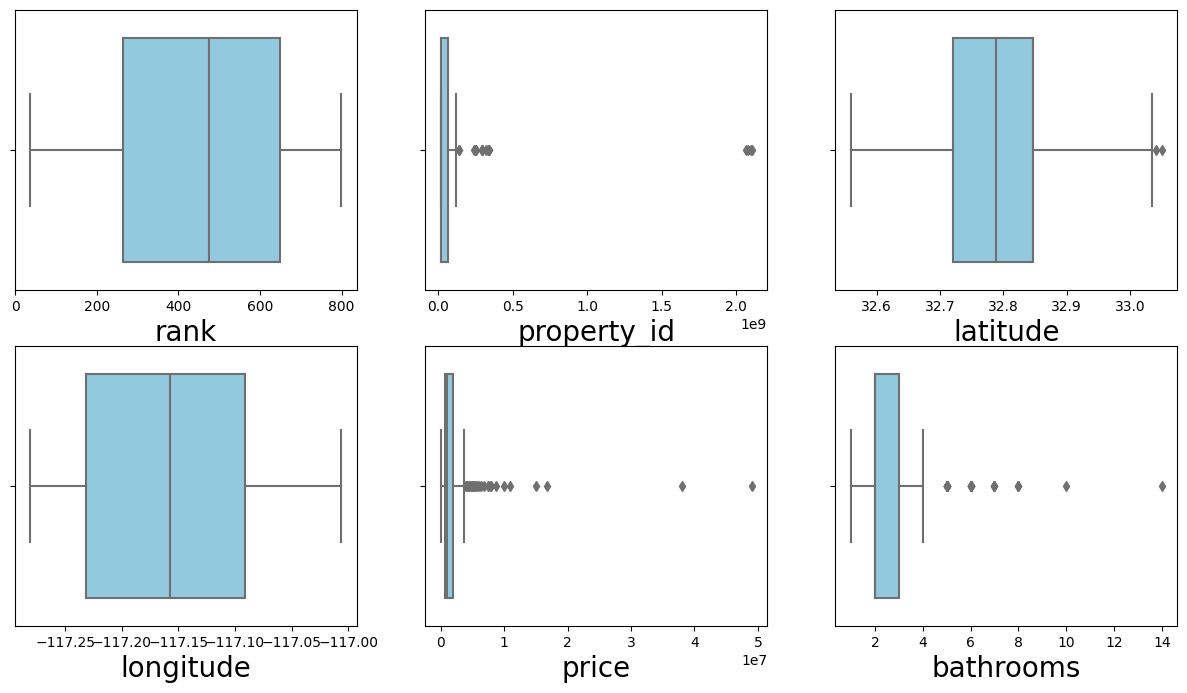

In [27]:
df_num = data2.select_dtypes(include=[np.number])
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot, color='skyblue') # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

The above box plot shows that 'price','bathrooms','property_id' has outliers and are right skewed with mean finely skewed too.

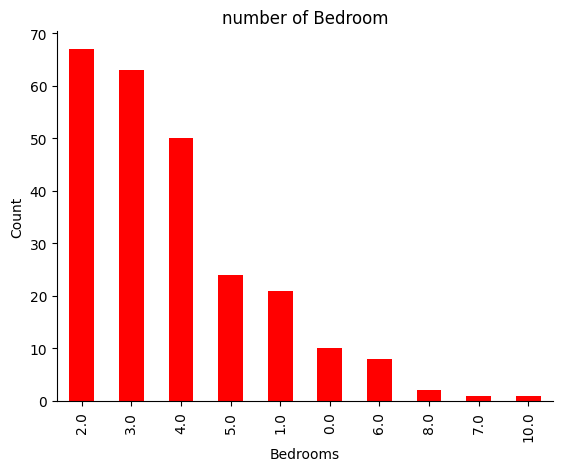

In [28]:
data2['bedrooms'].value_counts().plot(kind='bar', color='r')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()

<Figure size 1000x1000 with 0 Axes>

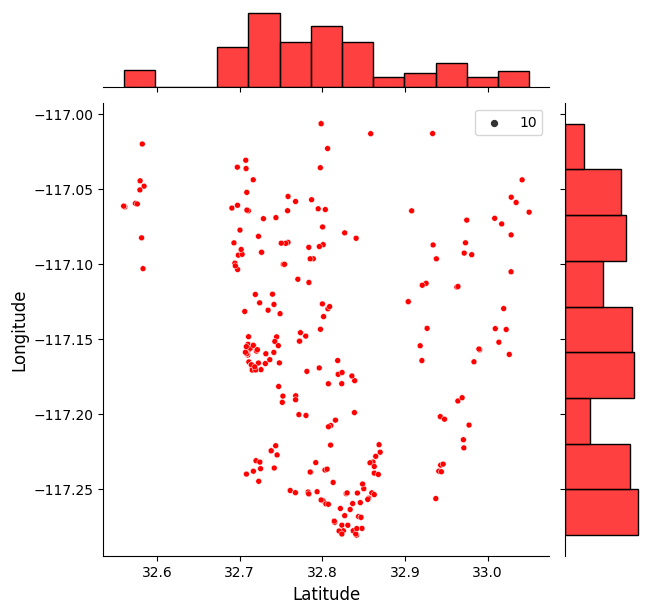

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data2.latitude.values, y=data2.longitude.values, size=10, color='r')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

sns.despine()

In [30]:
data2['area'] = (data2.area.str.rsplit(' ', expand = True)[0]).astype(float)

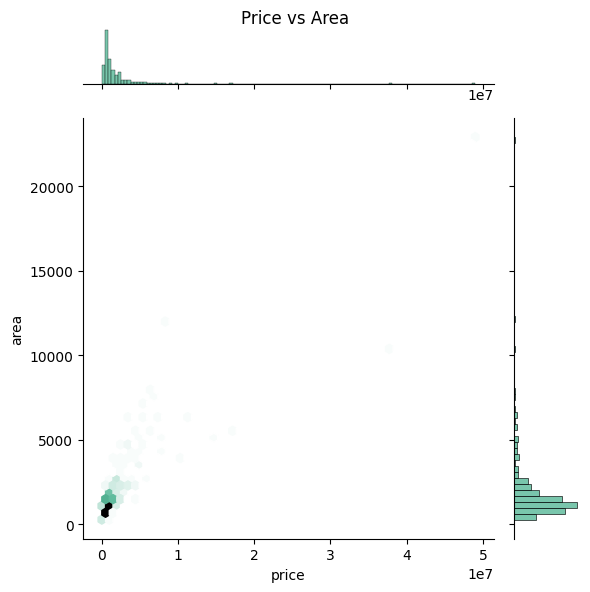

In [31]:
p = sns.jointplot(x=data2.price, y=data2.area, kind="hex", color="#4CB391")
p.fig.suptitle("Price vs Area")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room

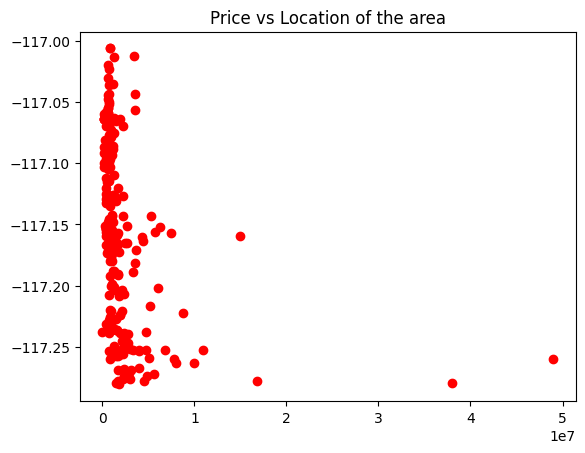

In [32]:
plt.scatter(data2.price,data2.longitude, color='r')
plt.title("Price vs Location of the area");

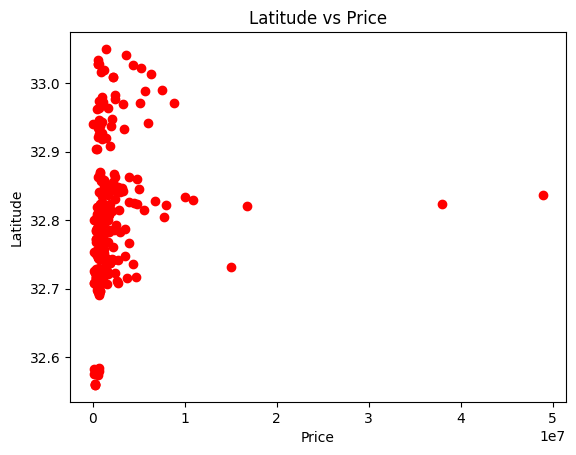

In [33]:
plt.scatter(data2.price,data2.latitude, color='r')
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price");

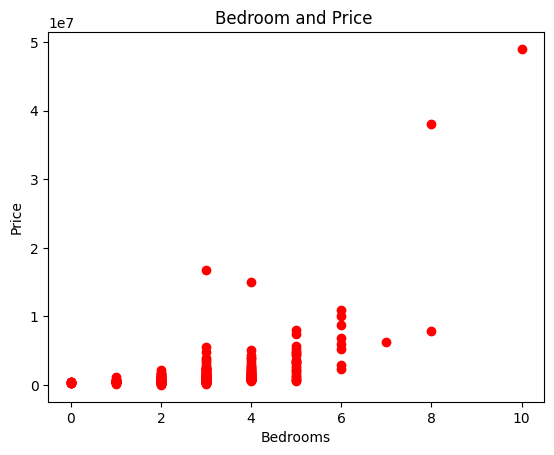

<Figure size 640x480 with 0 Axes>

In [34]:
plt.scatter(data2.bedrooms,data2.price, color='r')
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine()

# 3. Data Amalgamation
Dataset 3(Scraped Dataset)

First data set
Second data enrichment -- get an amalgamation; each enrichment enables you to implement / use more algorithms as needed.
Third data enrichment -- scrape data from a source and amalgamate

In [35]:
amalgam_link = 'https://drive.google.com/file/d/1C2KozYasnhl-AfEl-bSB9M_a5IXlPR_i/view?usp=drive_link'
amalgam_id = amalgam_link.split("/")[-2]
amalgam_data = drive.CreateFile({'id':amalgam_id})
amalgam_data.GetContentFile('House_Pricing.csv')

In [36]:
amalgam_data = pd.read_csv('House_Pricing.csv')
amalgam_data.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.000000
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.000000
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2721596.000000
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,212968.000000
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,224529.000000


In [37]:
cols_to_drop = ['stories','carport_sqft','livable_sqft','house_number','unit_number',
                'half_bathrooms', 'garage_type','garage_sqft','has_pool','has_fireplace',
                'has_central_heating','has_central_cooling']
amalgam_data.drop(cols_to_drop, axis = 1, inplace=True)

In [38]:
rename_dict = {'total_sqft':'area','year_built':'year','sale_price':'price',
               'zip_code':'zipcode', 'num_bedrooms':'bedrooms', 'full_bathrooms':'bathrooms'}
amalgam_data.rename(columns=rename_dict, inplace=True)

In [39]:
amalgam_data['year'] = pd.to_numeric(amalgam_data['year'], errors='coerce').fillna(-1).astype(int)

In [40]:
amalgam_data.head()

,year,bedrooms,bathrooms,area,street_name,city,zipcode,price
0,1978,4,1,1859,Lopez Crossing,Hallfort,10907,270897.000000
1,1958,3,1,2002,Gardner Park,Hallfort,10907,302404.000000
2,2002,3,2,1578,Harding Islands,Lake Christinaport,11203,2721596.000000
3,2004,4,2,2277,Michelle Highway,Lake Christinaport,11203,212968.000000
4,2006,4,2,1749,Jacob Cape,Lake Christinaport,11203,224529.000000


In [41]:
amalgam_data['address'] = amalgam_data[['street_name', 'city']].agg(', '.join, axis=1)

In [42]:
amalgam_data.drop(['street_name', 'city'], axis =1, inplace=True)

In [43]:
amalgam_data.isna().sum()

year         0
bedrooms     0
bathrooms    0
area         0
zipcode      0
price        0
address      0
dtype: int64

In [44]:
amalgam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42703 entries, 0 to 42702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       42703 non-null  int64  
 1   bedrooms   42703 non-null  int64  
 2   bathrooms  42703 non-null  int64  
 3   area       42703 non-null  int64  
 4   zipcode    42703 non-null  int64  
 5   price      42703 non-null  float64
 6   address    42703 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 2.3+ MB


## First Amalgamation with Dataset 1

In [45]:
df = data1.merge(amalgam_data, on=['address','price','area','bathrooms','bedrooms'], how = 'outer')

In [46]:
df.drop(['year', 'zipcode'], inplace=True, axis=1)
df.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow
0,27.000000,15389006.000000,"1787 Oceanaire Ct, San Luis Obispo, CA 93405",35.257103,-120.684715,999000.000000,2.000000,4.000000,1902.000000,1001400.000000,3658.000000,16.000000
1,57.000000,15389006.000000,"1787 Oceanaire Ct, San Luis Obispo, CA 93405",35.257103,-120.684715,999000.000000,2.000000,4.000000,1902.000000,1001400.000000,3658.000000,16.000000
2,215.000000,19825038.000000,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000.000000,2.000000,4.000000,1501.000000,1226500.000000,4164.000000,23.000000
3,463.000000,16842518.000000,"4085 Caminito Terviso, San Diego, CA 92122",32.857420,-117.225050,1950000.000000,3.000000,4.000000,2434.000000,1904800.000000,6287.000000,37.000000
4,474.000000,16989893.000000,"6871 Alvarado Rd UNIT 10, San Diego, CA 92120",32.775852,-117.051080,549000.000000,3.000000,3.000000,1445.000000,557500.000000,3499.000000,3.000000


## **Gini Score Index for Feature Importance**

In [47]:
X_df= df.drop(['address','property_id','rank', 'days_on_zillow', 'zestimate','price'], axis=1)
y_df = df['price']

In [48]:
X_df[['latitude', 'longitude', 'rent_zestimate']] = X_df[['latitude', 'longitude', 'rent_zestimate']].fillna(X_df[['latitude', 'longitude', 'rent_zestimate']].mean())

In [49]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.25)
X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape

((32933, 6), (10978, 6), (32933,), (10978,))

## Feature Importances

Calculating GINI score for each feature. This will help use find the important features

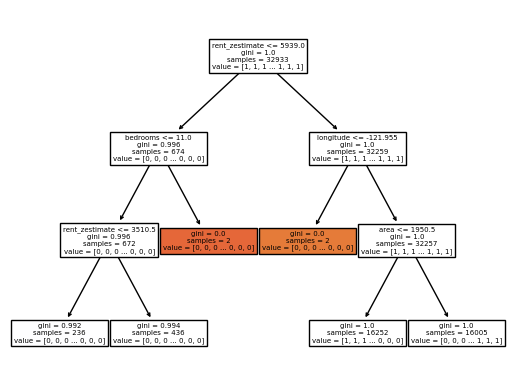

In [50]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=6,criterion='gini')
decision_tree = decision_tree.fit(X_train_df,y_train_df)
labels = X_train_df.columns
dot_data = tree.plot_tree(decision_tree, filled = True, feature_names=X_train_df.columns)

In [51]:
from sklearn.tree import DecisionTreeRegressor

def DTR(x_train, x_test, y_train, y_test):
    dt_model=DecisionTreeRegressor(max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

    dt_model.fit(X_train_df, y_train_df)
    score = dt_model.score(x_test, y_test)
    print("R2 Score:", score)
    return dt_model

In [52]:
def FeatureImp(fi):
  a = {'Features': X_train_df.columns, 'Importance': fi}
  imp_features = pd.DataFrame.from_dict(a, orient='index')
  imp_features = imp_features.transpose()

  imp_features = imp_features.sort_values('Importance', ascending = False)

  sns.barplot(x = 'Importance', y = 'Features', data = imp_features)

  plt.title('Feature Importance', fontsize = 15)
  plt.xlabel('Importance', fontsize = 15)
  plt.ylabel('Features', fontsize = 15)

  plt.show()

In [53]:
clf_fi = DTR(X_train_df, X_test_df, y_train_df, y_test_df)

R2 Score: 0.5741234485629869


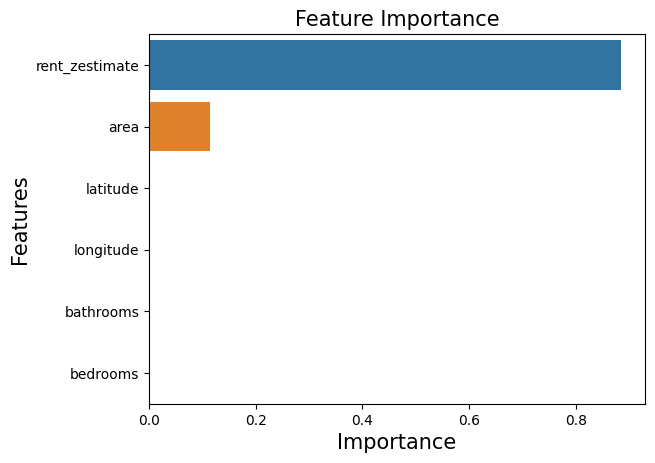

In [54]:
FeatureImp(clf_fi.feature_importances_)

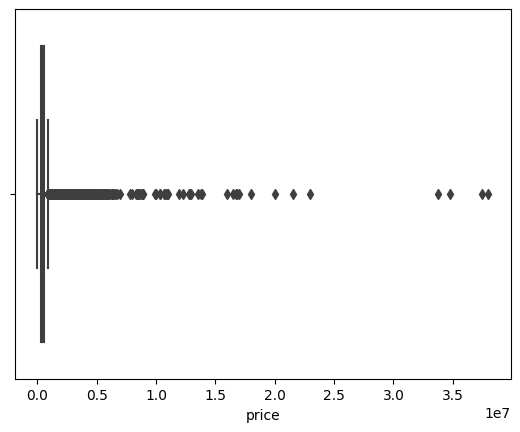

In [55]:
sns.boxplot(x=df['price']);

Price feature has a lot of outliers and the mean is slightly skewed

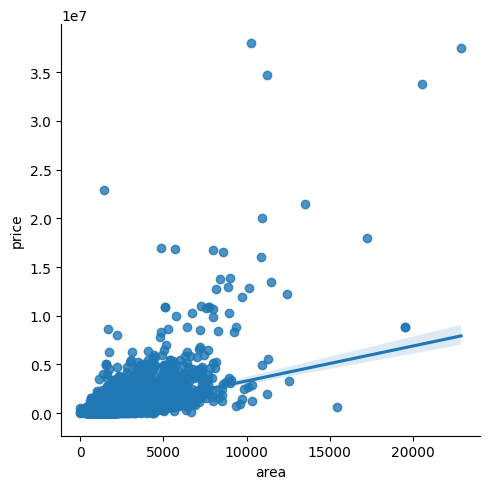

In [56]:
sns.lmplot(x='area',y='price',data=df);

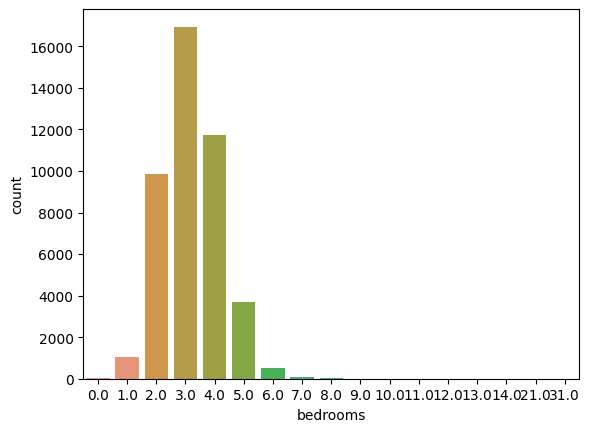

In [57]:
sns.countplot(x='bedrooms',data=df);

3 Bedrooms house are most popular and this shows that most buyers interested homes are 3 bedrooms and 2 bathroomswith price range

In [58]:
import plotly.express as ex
ex.pie(df,names='bedrooms',title='bedrooms distribution',hole=0.20)

In [59]:
for col in ['bedrooms', 'bathrooms']:
    print(col + ':')
    print(df[col].value_counts())
    print()

bedrooms:
3.000000     16948
4.000000     11751
2.000000      9843
5.000000      3688
1.000000      1029
6.000000       511
7.000000        63
0.000000        34
8.000000        19
10.000000        6
9.000000         5
14.000000        3
31.000000        3
12.000000        3
11.000000        3
13.000000        1
21.000000        1
Name: bedrooms, dtype: int64

bathrooms:
2.000000     23827
1.000000     11830
3.000000      6461
4.000000      1278
0.000000       225
5.000000       189
6.000000        55
7.000000        16
8.000000        11
9.000000         7
10.000000        6
12.000000        2
11.000000        1
15.000000        1
14.000000        1
13.000000        1
Name: bathrooms, dtype: int64



# 4. Utilities

Here are some helper function that we will be using in the following section . . .

###**Muller Loop for Classificaiton**

classification can be used to predict whether a property is likely to be expensive or affordable. For example, the model can be trained to classify properties as either high-end or low-end based on their features. This information can help homeowners and property investors make informed decisions about whether to invest in a particular property or not

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

classifiers_names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
                     "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(random_state = 10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

def muller_classification(X_train, X_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over classifiers
  metrics_df = pd.DataFrame({
      'Classifier': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': [],
      'Recall':[],
      'Precision': []
      })

  for name, clf in zip(classifiers_names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = 100.0 * clf.score(X_test, y_test)
    mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
    mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
    r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
    test_acc = metrics.accuracy_score(y_test, y_pred) * 100
    recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
    precision = metrics.precision_score(y_test, y_pred, average = 'weighted')
    new_row = pd.DataFrame({
    'Classifier': name,
    'MSE' : mean_absolute_error,
    'MAE': mean_squared_error,
    'RSquared': r_squared,
    'Test Accuracy': test_acc,
    'Recall': recall,
    'Precision': precision}, index=[0])

    metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)

    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

  print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

  return metrics_df

###**Muller Loop for Regression**

Regression can be used to predict the exact price of a property based on its features. For example, the model can be trained to predict the price of a house based on its square footage, location, and other features. This information can assist real estate agents and property investors in accurately pricing properties based on their features.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics

regressors_names = ["Linear Regression", "MLP Regressor", "RandomForest Regressor",
              "Gradient Boosting Regressor", "KNeighbors Regressor", "SGD Regressor",
              "KernelRidge Regressor"
         ]

regressors = [
    LinearRegression(),
    MLPRegressor(random_state=1, max_iter=500),
    RandomForestRegressor(max_depth=4, random_state=1),
    GradientBoostingRegressor(random_state=1),
    KNeighborsRegressor(n_neighbors=2),
    SGDRegressor(max_iter=1000, tol=1e-3),
    KernelRidge(alpha=1.0)
    ]

def muller_regression(x_train, x_test, y_train, y_test):
  max_score = 0.0
  max_class = ''
  # iterate over regressors
  metrics_df = pd.DataFrame({
      'Regressor': [],
      'MSE' : [],
      'MAE': [],
      'RSquared': [],
      'Test Accuracy': []
      })
  for name, reg in zip(regressors_names, regressors):
      reg.fit(x_train, y_train)
      y_pred = reg.predict(x_test)
      score = 100.0 * reg.score(x_test, y_test)
      mean_absolute_error = np.round(metrics.mean_absolute_error(y_test, y_pred), 2)
      mean_squared_error = np.round(metrics.mean_squared_error(y_test, y_pred), 2)
      r_squared = np.round(metrics.r2_score(y_test, y_pred), 2)
      new_row = pd.DataFrame({
      'Regressor': name,
      'MSE' : mean_absolute_error,
      'MAE': mean_squared_error,
      'RSquared': r_squared,
      'Test Accuracy': score}, index=[0])
      metrics_df = pd.concat([new_row,metrics_df.loc[:]]).reset_index(drop=True)


      print('Regressor = %s, Score (test, accuracy) = %.2f,' %(name, score))
      if score > max_score:
          reg_best = reg
          max_score = score
          max_class = name

  print('Best --> Regressor = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

  return metrics_df

## **Clustering**

clustering can be useful in identifying areas with similar housing characteristics and prices. For example, the model can group together houses that have similar features, such as total area, number of bedrooms and bathrooms, and other amenities. This information can assist real estate companies and property investors in identifying areas with similar property characteristics and prices.

##**Fractal Distance Calculation**

Fractal-clustering can be used to identify patterns in the dataset that may not be apparent through other techniques. For an instance, the model can be used to identify clusters of houses with similar pricing and features that may be located in different neighborhoods. This information can assist real estate companies and property investors in identifying areas with high potential for property appreciation.



In [62]:
def fractal_distance(p1, p2):
  x1, y1, x2, y2 = p1[0],p1[1], p2[0], p2[1]
  num_divisions = 3
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
  grid = np.zeros((num_divisions, num_divisions))

  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1)) - 1
  y1_idx = np.argmin(np.abs(y - y1)) - 1
  grid[y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2)) - 1
  y2_idx = np.argmin(np.abs(y - y2)) - 1
  grid[y2_idx, x2_idx] = 1

  # Count the number of boxes that contain at least one point
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      if np.sum(grid[i:i+2, j:j+2]) > 0:
        num_boxes_with_points += 1

  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
  return fractal_length

###**K-Means with Fractal distance**

In [63]:
!pip install pyclustering  -qU

In [64]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.silhouette import silhouette

def plot_cluster_fractal(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values

    silhouette_score = {}
    metric  = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)

    for k in range(2, max_loop):
        initial_centers = random_center_initializer(X, k, random_state=5).initialize()
        instance = kmeans(X, initial_centers=initial_centers, metric=metric)
        instance.process()
        silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
        silhouette_score[k] = sum(silhouette_score_i) / len(silhouette_score_i)

    _ = plt.figure(figsize=(10,6))

    ax1 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [65]:
def apply_cluster_fractal(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:].values
    metric  = distance_metric(type_metric.USER_DEFINED, func=fractal_distance)
    initial_centers = random_center_initializer(X, clusters, random_state=5).initialize()
    instance = kmeans(X, initial_centers=initial_centers, metric=metric)
    instance.process()
    silhouette_score_i = silhouette(X, instance.get_clusters()).process().get_score()
    score = sum(silhouette_score_i) / len(silhouette_score_i)

    type_repr = instance.get_cluster_encoding()
    encoder = cluster_encoder(type_repr, instance.get_clusters(), X)
    encoder.set_encoding(type_encoding.CLUSTER_INDEX_LABELING)
    cluster = encoder.get_clusters()
    column_series = pd.Series(np.array(cluster))
    df = df.assign(cluster=column_series)

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score))

    return df

###**K-Means with Euclidean distance**

In [66]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

def plot_cluster_euclidean(df, max_loop=50):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [67]:
def apply_cluster_euclidean(df, clusters=2):
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster))

    return df

# 5. Latent Variables

We scraped a beautiful dataset consisting of predominant latent variables which can be the form factors while choosing the right house. These latent variables predominantly act as a characteristic feature for houses which indirectly may impact on the popularity, pricing and considerations of houses of that location.
For the location, we scraped walkability, mix of employment types in a block group (such as retail, office, or industrial), percentage of workers that are low, medium, or high wage (by home and work locations).


## Loading Latent Variable Dataset

In [68]:
latent_link = 'https://drive.google.com/file/d/1qtfM00GLQ-G72od8hpAIEsF5aQ5MxNxG/view?usp=drive_link'
id3 = latent_link.split("/")[-2]
downloaded3 = drive.CreateFile({'id':id3})
downloaded3.GetContentFile('Latent.csv')

In [69]:
latent_df = pd.read_csv('Latent.csv')
latent_df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,AutoOwn1,Pct_AO1,AutoOwn2p,Pct_AO2p,Workers,R_LowWageWk,R_MedWageWk,R_HiWageWk,R_PCTLOWWAGE,TotEmp,E5_Ret,E5_Off,E5_Ind,E5_Svc,E5_Ent,E8_Ret,E8_off,E8_Ind,E8_Svc,E8_Ent,E8_Ed,E8_Hlth,E8_Pub,E_LowWageWk,E_MedWageWk,E_HiWageWk,E_PctLowWage,D1A,D1B,D1C,D1C5_RET,D1C5_OFF,D1C5_IND,D1C5_SVC,D1C5_ENT,D1C8_RET,D1C8_OFF,D1C8_IND,D1C8_SVC,D1C8_ENT,D1C8_ED,D1C8_HLTH,D1C8_PUB,D1D,D1_FLAG,D2A_JPHH,D2B_E5MIX,D2B_E5MIXA,D2B_E8MIX,D2B_E8MIXA,D2A_EPHHM,D2C_TRPMX1,D2C_TRPMX2,D2C_TRIPEQ,D2R_JOBPOP,D2R_WRKEMP,D2A_WRKEMP,D2C_WREMLX,D3A,D3AAO,D3AMM,D3APO,D3B,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4A,D4B025,D4B050,D4C,D4D,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI,D5CE,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,481130000000.000000,481130000000.000000,48,113,7825,4,206.000000,"Dallas-Fort Worth, TX-OK",19100.000000,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,0.000000,73.595028,73.595028,1202,460.000000,423.000000,0.549000,69,0.163121,39,0.092199,315,0.744681,412,99,122,191,0.240291,66,20,3,0,19,24,20,3,0,15,24,0,4,0,21,27,18,0.318182,6.250422,16.332625,0.896800,0.271757,0.040764,0.000000,0.258170,0.326109,0.271757,0.040764,0.000000,0.203818,0.326109,0.000000,0.054351,0.000000,7.147222,0,0.156028,0.886264,0.763386,0.855442,0.662091,0.348912,0.526296,0.585916,0.287128,0.104101,0.276151,6.242424,0.005287,23.534900,0.000000,10.655277,12.879623,115.981747,0.000000,60.873677,8.696240,34.784958,43.481198,362.100000,0.000000,0.000000,4.330000,37.654717,0.003602,433601,303660,135362,53504,0.000398,0.785893,0.000358,0.841299,0.000525,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.083100
1,2,481130000000.000000,481130000000.000000,48,113,7825,2,206.000000,"Dallas-Fort Worth, TX-OK",19100.000000,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,0.000000,119.829909,119.214200,710,409.000000,409.000000,0.466000,0,0.000000,168,0.410758,241,0.589242,395,76,107,212,0.192405,25,7,0,3,15,0,7,0,3,13,0,0,2,0,10,4,11,0.400000,3.430799,5.955666,0.209707,0.058718,0.000000,0.025165,0.125824,0.000000,0.058718,0.000000,0.025165,0.109047,0.000000,0.000000,0.016777,0.000000,3.640506,0,0.061125,0.835015,0.569986,0.831686,0.554458,0.197047,0.248481,0.271309,0.002033,0.068027,0.119048,15.800000,0.000000,22.893366,0.755137,2.859482,19.278747,80.145600,5.340904,10.681807,10.681807,85.454458,5.340904,718.840000,0.000000,0.009516,4.330000,23.126113,0.006099,386504,272135,236885,90089,0.000355,0.700531,0.000321,0.753958,0.000919,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.146600
2,3,481130000000.000000,481130000000.000000,48,113,7825,3,206.000000,"Dallas-Fort Worth, TX-OK",19100.000000,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,0.000000,26.367053,26.367050,737,365.000000,329.000000,0.811000,19,0.057751,143,0.434650,167,0.507599,463,136,189,138,0.293737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,13.843035,27.951553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.843035,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367879,0.000000,1.000000,0.000000,0.000000,14.210509,6.128365,2.611430,5.470714,24.272717,24.272717,0.000000,24.272717,0.000000,0.000000,398.310000,0.000000,0.000000,3.000000,72.818150,0.004071,404573,288925,230587,82815,0.000371,0.733281,0.000340,0.800475,0.000894,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.928100
3,4,481130000000.000000,481130000000.000000,48,113,7824,1,206.000000,"Dallas-Fort Worth, TX-OK",19100.000000,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,0.000000,119.060687,119.060687,904,384.000000,384.000000,0.638000,0,0.000000,43,0.111979,341,0.888021,431,60

In [70]:

def lv_mapper(column, data_mapper):
  idx_mapper = dict(latent_df.groupby(['CSA_Name'])[column].mean())
  idx_data_mapper = {}

  for d, v in data_mapper.items():
    for i in idx_mapper:
      if v in i:
        idx_data_mapper[d] = idx_mapper[i]
        break
  return idx_data_mapper

## Dataset 1 + Latent Variables

In [71]:
data1_mapper = {}
for val in set(data1['address']):
  data1_mapper[val] = val.split(',')[-2].strip()

In [72]:
data1_latent = data1.copy()
data1_latent['NatWalkInd'] = data1_latent['address'].map(lv_mapper('NatWalkInd', data1_mapper))
data1_latent['D2B_E8MIXA'] = data1_latent['address'].map(lv_mapper('D2B_E8MIXA', data1_mapper))
data1_latent['R_PCTLOWWAGE'] = data1_latent['address'].map(lv_mapper('R_PCTLOWWAGE', data1_mapper))
data1_latent.isnull().sum()

rank                0
property_id         0
address             0
latitude            0
longitude           0
price               0
bathrooms           0
bedrooms            0
area                0
zestimate           0
rent_zestimate      0
days_on_zillow      0
NatWalkInd        884
D2B_E8MIXA        884
R_PCTLOWWAGE      884
dtype: int64

In [73]:
data1_latent.dropna(inplace=True)

## Amalgamation + Latent Variables

In [74]:
amalgamation_mapper = {}
for val in set(df['address']):
  amalgamation_mapper[val] = val.split(',')[-2][1:]

In [75]:
df_latent = df
df_latent['NatWalkInd'] = df_latent['address'].map(lv_mapper('NatWalkInd', amalgamation_mapper))
df_latent['D2B_E8MIXA'] = df_latent['address'].map(lv_mapper('D2B_E8MIXA', amalgamation_mapper))
df_latent['R_PCTLOWWAGE'] = df_latent['address'].map(lv_mapper('R_PCTLOWWAGE', amalgamation_mapper))

In [76]:
df_latent.isnull().sum()

rank              42703
property_id       42703
address               0
latitude          42703
longitude         42703
price                 0
bathrooms             0
bedrooms              0
area                  0
zestimate         42703
rent_zestimate    42703
days_on_zillow    42703
NatWalkInd        43585
D2B_E8MIXA        43585
R_PCTLOWWAGE      43585
dtype: int64

In [77]:
df_latent.dropna(inplace=True)

# 6. Implementing Machine Learning Algorithms

Define a Golden cluster and use Fractal Clustering to find it based on the business case you formulate

train and Apply algorithms : you can use the muller loop

classify: Muller, at least 5 algos
Regression: Muller, at least 7 algos
Compare relevant tasks in the same table.

Write a data narrative to interpret results of each algorithm

## Fractal Clustering with Euclidean Distance

In [78]:
clustering_df = df.drop(['address','property_id', 'zestimate'], axis=1)

**First Iteration**

For clustering, one needs to know the number of clusters before hand. Here, we will use "WCS" and "Silhouette" score to decide the number of clusters

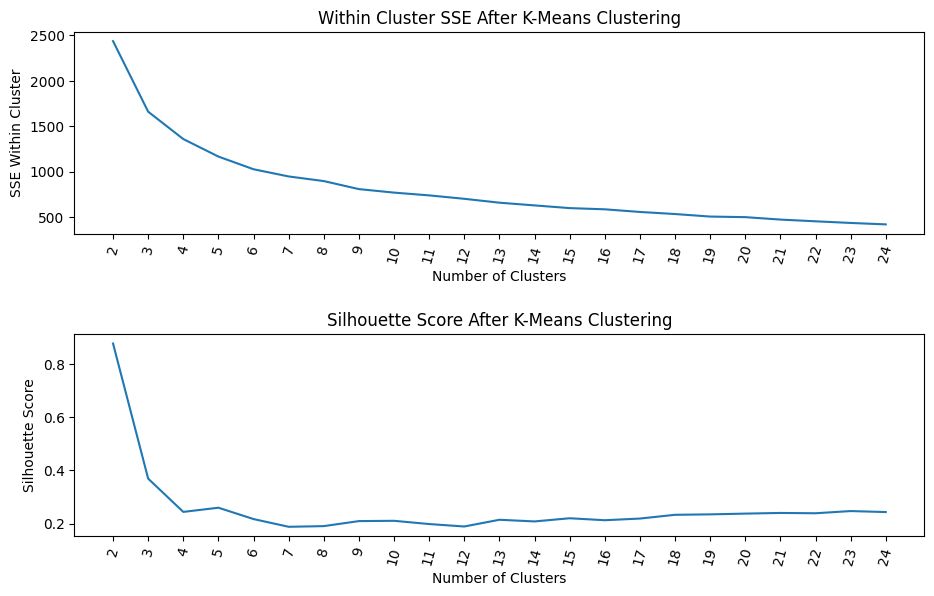

In [79]:
plot_cluster_euclidean(clustering_df, 25)

In [80]:
first_trial = apply_cluster_euclidean(clustering_df, 3)

clustering performance
-----------------------------------
silhouette score: 0.37
sse withing cluster: 1659.497162060564


In [81]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0           73
1        1            2
2        2          249
Name: cluster, dtype: int64

In [82]:
colors = ['#DF2020', '#81DF20', '#2095DF']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
first_trial.head()

,rank,latitude,longitude,price,bathrooms,bedrooms,area,rent_zestimate,days_on_zillow,NatWalkInd,D2B_E8MIXA,R_PCTLOWWAGE,cluster,c
2,215.000000,37.257305,-121.806980,1250000.000000,2.000000,4.000000,1501.000000,4164.000000,23.000000,12.617343,0.573923,0.181678,2,#2095DF
5,245.000000,37.253390,-121.912270,1848000.000000,3.000000,4.000000,2467.000000,5950.000000,37.000000,12.617343,0.573923,0.181678,0,#DF2020
7,123.000000,37.390440,-121.808160,2700000.000000,6.000000,5.000000,5121.000000,9794.000000,107.000000,12.617343,0.573923,0.181678,0,#DF2020
11,301.000000,37.268017,-121.823750,950000.000000,3.000000,3.000000,1452.000000,3699.000000,17.000000,12.617343,0.573923,0.181678,2,#2095DF
13,391.000000,37.304363,-121.979520,5000000.000000,3.000000,3.000000,1559.000000,6107.000000,30.000000,12.617343,0.573923,0.181678,0,#DF2020


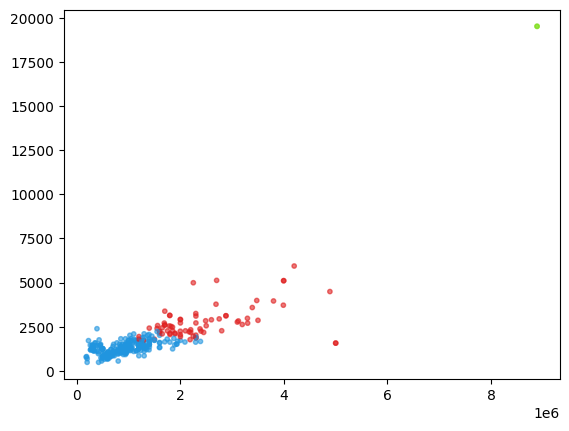

In [83]:
plt.scatter(first_trial['price'], first_trial['area'],c=first_trial.c, alpha = 0.6, s=10);

We see that after the first iterration there is one prominent cluster (blue cluster) and hence we need to perform a second iteration on the blue cluster.

**Second Iteration**

In [84]:
df3 = first_trial.query("cluster == 2").reset_index(drop=True).drop(['c'], axis=1)

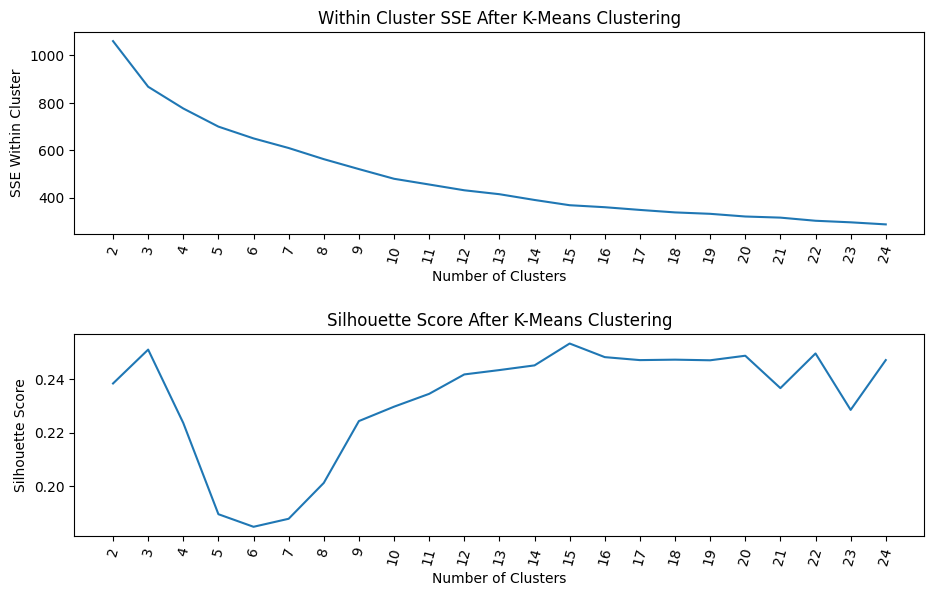

In [85]:
plot_cluster_euclidean(df3, max_loop=25)

In [86]:
second_trial= apply_cluster_euclidean(df3, clusters=2)

clustering performance
-----------------------------------
silhouette score: 0.24
sse withing cluster: 1059.924324058716


In [87]:
cluster_perf_df = second_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          125
1        1          124
Name: cluster, dtype: int64

**Golden Cluster**:
During the Clustering 2, we found that there are 2 clusters 0, 1 with each value mean value of price and rent zestimates. CLuster 0 being the **golden cluster** has 125 units has greaterr value than other cluster 124.

## Fractal Clustering with Fractal Distance

This is another metric to calculate distance between two points

In [88]:
clustering_df = df.drop(['address','property_id', 'zestimate'], axis=1)
clustering_df.shape

(324, 12)

**First Iteration**

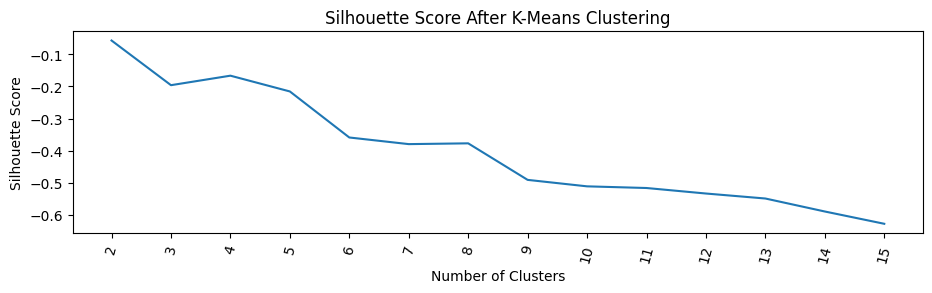

In [89]:
plot_cluster_fractal(clustering_df, 16)

In [90]:
first_trial = apply_cluster_fractal(clustering_df, 2)

clustering performance
-----------------------------------
silhouette score: -0.057084464486309744


In [91]:
cluster_perf_df = first_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster   cluster 
0.000000  0.000000    37
1.000000  1.000000    46
Name: cluster, dtype: int64

In [92]:
colors = ['#DF2020', '#81DF20']
first_trial['c'] = first_trial.cluster.map({0:colors[0], 1:colors[1]})
first_trial.dropna(inplace=True)
first_trial.head()

,rank,latitude,longitude,price,bathrooms,bedrooms,area,rent_zestimate,days_on_zillow,NatWalkInd,D2B_E8MIXA,R_PCTLOWWAGE,cluster,c
2,215.000000,37.257305,-121.806980,1250000.000000,2.000000,4.000000,1501.000000,4164.000000,23.000000,12.617343,0.573923,0.181678,0.000000,#DF2020
5,245.000000,37.253390,-121.912270,1848000.000000,3.000000,4.000000,2467.000000,5950.000000,37.000000,12.617343,0.573923,0.181678,1.000000,#81DF20
7,123.000000,37.390440,-121.808160,2700000.000000,6.000000,5.000000,5121.000000,9794.000000,107.000000,12.617343,0.573923,0.181678,1.000000,#81DF20
11,301.000000,37.268017,-121.823750,950000.000000,3.000000,3.000000,1452.000000,3699.000000,17.000000,12.617343,0.573923,0.181678,0.000000,#DF2020
13,391.000000,37.304363,-121.979520,5000000.000000,3.000000,3.000000,1559.000000,6107.000000,30.000000,12.617343,0.573923,0.181678,0.000000,#DF2020


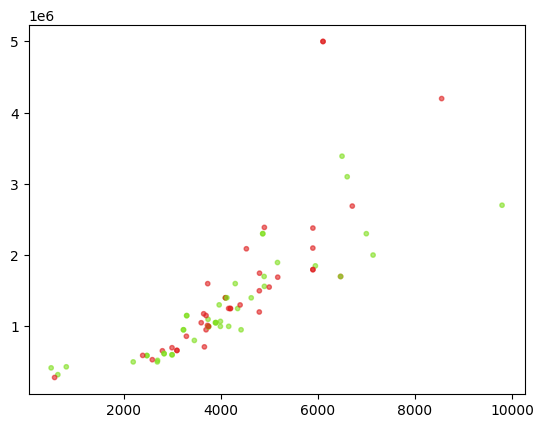

In [93]:
plt.scatter(first_trial['rent_zestimate'], first_trial['price'],c=first_trial.c, alpha = 0.6, s=10);

We see that after the first iterration there is 1 prominent cluster and hence we need to perform a second iteration on this cluster.

**Second Iteration**

In [94]:
df3 = first_trial.query("cluster == 1").reset_index(drop=True).drop(['c'], axis=1)

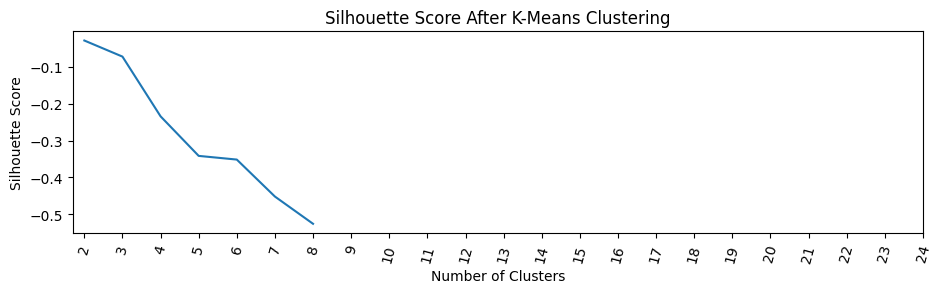

In [95]:
plot_cluster_fractal(df3, max_loop=25)

In [96]:
second_trial= apply_cluster_fractal(df3, clusters=2)

clustering performance
-----------------------------------
silhouette score: -0.028574427458942012


In [97]:
cluster_perf_df = second_trial.groupby('cluster')
cluster_perf_df['cluster'].value_counts()

cluster  cluster
0        0          25
1        1          21
Name: cluster, dtype: int64

## Classification using Muller Loop

Muller Method is an optimization technique to learn function to map features to output.

### Dataset 1

In [98]:
data1.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow
0,27,15389006,"1787 Oceanaire Ct, San Luis Obispo, CA 93405",35.257103,-120.684715,999000,2.000000,4.000000,1902.000000,1001400.000000,3658.000000,16.000000
1,215,19825038,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000,2.000000,4.000000,1501.000000,1226500.000000,4164.000000,23.000000
2,463,16842518,"4085 Caminito Terviso, San Diego, CA 92122",32.857420,-117.225050,1950000,3.000000,4.000000,2434.000000,1904800.000000,6287.000000,37.000000
3,474,16989893,"6871 Alvarado Rd UNIT 10, San Diego, CA 92120",32.775852,-117.051080,549000,3.000000,3.000000,1445.000000,557500.000000,3499.000000,3.000000
9,245,59683322,"1730 Cambria Ct, San Jose, CA 95124",37.253390,-121.912270,1848000,3.000000,4.000000,2467.000000,1792100.000000,5950.000000,37.000000


### Adding HOA for classificaiton

HOA: Home Owner Association
For further in-depth investigation of house pricing and looking for some correlating factors, we introduce HOA, mortgage to our dataset. These are basically to calculate the appreciation trends of a property preleased property.
On investigating we came to conclusion that the least interested houses are the houses with high price and mortgage fees. This reflects that irrespective of spatial features of houses and latent variables, unreasonable pricing caused the buyers to neglect such housing options.  

In [99]:
hoa_link = 'https://drive.google.com/file/d/174LrjOk9rO5gbm-PNn97HGAZVnn-BYrp/view?usp=drive_link'
id4 = hoa_link.split("/")[-2]

downloaded4 = drive.CreateFile({'id':id4})
downloaded4.GetContentFile('HOA.csv')

In [100]:
hoa_df = pd.read_csv('HOA.csv')
hoa_df.head()

,Rank,Metro,Median monthly HOA fee,Median HOA fee as a share of total monthly housing costs,Percentage of homeowners with an HOA fee,Median home price
0,1,"Urban Honolulu, HI",520.000000,0.220000,0.300000,"753,653.00"
1,2,"New York-Newark-Jersey City, NY-NJ-PA",410.000000,0.170000,0.100000,"520,587.00"
2,3,"San Francisco-Oakland-Berkeley, CA",400.000000,0.140000,0.140000,"1,192,921.00"
3,4,"San Jose-Sunnyvale-Santa Clara, CA",370.000000,0.110000,0.150000,"1,325,899.00"
4,5,"Seattle-Tacoma-Bellevue, WA",360.000000,0.190000,0.110000,"601,735.00"


In [101]:
def hoa_mapper(column, data_mapper):
  idx_mapper = dict(hoa_df.groupby(['Metro'])[column].mean())
  idx_data_mapper = {}

  for d, v in data_mapper.items():
    for i in idx_mapper:
      if v in i:
        idx_data_mapper[d] = idx_mapper[i]
        break
  return idx_data_mapper

In [102]:
data1['hoa'] = data1['address'].map(hoa_mapper('Median monthly HOA fee', data1_mapper))
data1.isnull().sum()

rank                0
property_id         0
address             0
latitude            0
longitude           0
price               0
bathrooms           0
bedrooms            0
area                0
zestimate           0
rent_zestimate      0
days_on_zillow      0
hoa               331
dtype: int64

In [103]:
data1.dropna(inplace=True)

Mortgage Fee = 0.0062 * Price (average based on multiple mortgage calculators online)

In [104]:
data1['mortgage_hoa'] = data1['hoa'] + data1['price'] * 0.0062

In [105]:
target_mapper = {
    0: 'Least Desirable',
    1: 'More Desirable',
    2: 'Most Desirable'
}

In [106]:
target = []
for row in data1[['mortgage_hoa', 'rent_zestimate']].iloc():
    if row['mortgage_hoa'] > row['rent_zestimate']: target.append(0)
    elif row['mortgage_hoa'] < row['rent_zestimate']: target.append(2)
    else: target.append(1)
data1['target'] = target

In [107]:
data1.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,hoa,mortgage_hoa,target
1,215,19825038,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000,2.000000,4.000000,1501.000000,1226500.000000,4164.000000,23.000000,370.000000,8120.000000,0
2,463,16842518,"4085 Caminito Terviso, San Diego, CA 92122",32.857420,-117.225050,1950000,3.000000,4.000000,2434.000000,1904800.000000,6287.000000,37.000000,330.000000,12420.000000,0
3,474,16989893,"6871 Alvarado Rd UNIT 10, San Diego, CA 92120",32.775852,-117.051080,549000,3.000000,3.000000,1445.000000,557500.000000,3499.000000,3.000000,330.000000,3733.800000,0
9,245,59683322,"1730 Cambria Ct, San Jose, CA 95124",37.253390,-121.912270,1848000,3.000000,4.000000,2467.000000,1792100.000000,5950.000000,37.000000,370.000000,11827.600000,0
10,192,63776919,"1435 India St UNIT 209, San Diego, CA 92101",32.720238,-117.168000,729000,2.000000,2.000000,862.000000,679400.000000,3499.000000,1.000000,330.000000,4849.800000,0


In [108]:
X = data1.drop(['address','property_id','latitude', 'longitude', 'zestimate', 'target'], axis=1)
y = data1['target']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [110]:
clf_metrics_data1 = muller_classification(X_train, X_test, y_train, y_test)

Classifier = Nearest Neighbors, Score (test, accuracy) = 97.73,
Classifier = Linear SVM, Score (test, accuracy) = 100.00,
Classifier = RBF SVM, Score (test, accuracy) = 97.35,
Classifier = Decision Tree, Score (test, accuracy) = 98.86,
Classifier = Random Forest, Score (test, accuracy) = 98.48,
Classifier = Neural Net, Score (test, accuracy) = 97.35,
Classifier = AdaBoost, Score (test, accuracy) = 99.24,
Classifier = Naive Bayes, Score (test, accuracy) = 91.67,
Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


## Regression Using Muller Loop

### Dataset 1

In [111]:
X = data1.drop(['address','property_id', 'zestimate', 'target', 'price', 'mortgage_hoa'], axis=1)
y = data1['price']

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [113]:
reg_metrics_data1 = muller_regression(x_train, x_test, y_train, y_test)

Regressor = Linear Regression, Score (test, accuracy) = 86.62,
Regressor = MLP Regressor, Score (test, accuracy) = 80.28,
Regressor = RandomForest Regressor, Score (test, accuracy) = 84.56,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 86.54,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 81.09,
Regressor = SGD Regressor, Score (test, accuracy) = -9950104017656946360320.00,
Regressor = KernelRidge Regressor, Score (test, accuracy) = 86.16,
Best --> Regressor = Linear Regression, Score (test, accuracy) = 86.62


### Amalgamation

In [114]:
X = df.drop(['address','property_id', 'zestimate', 'price'], axis=1)
y = df['price']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [116]:
reg_metrics_amal = muller_regression(x_train, x_test, y_train, y_test)

Regressor = Linear Regression, Score (test, accuracy) = 88.98,
Regressor = MLP Regressor, Score (test, accuracy) = 12.36,
Regressor = RandomForest Regressor, Score (test, accuracy) = 63.30,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 66.51,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 58.22,
Regressor = SGD Regressor, Score (test, accuracy) = -12104897788950396010496.00,
Regressor = KernelRidge Regressor, Score (test, accuracy) = 94.02,
Best --> Regressor = KernelRidge Regressor, Score (test, accuracy) = 94.02


### Dataset1 + Latent Variables

In [117]:
X = data1_latent.drop(['address','property_id', 'zestimate', 'price'], axis=1)
y = data1_latent['price']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [119]:
reg_metrics_data1_latent = muller_regression(x_train, x_test, y_train, y_test)

Regressor = Linear Regression, Score (test, accuracy) = 74.34,
Regressor = MLP Regressor, Score (test, accuracy) = -35.41,
Regressor = RandomForest Regressor, Score (test, accuracy) = 86.52,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 88.34,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 84.86,
Regressor = SGD Regressor, Score (test, accuracy) = -175832252861505247117312.00,
Regressor = KernelRidge Regressor, Score (test, accuracy) = 74.03,
Best --> Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 88.34


### Amalgamation + Latent Variables

In [120]:
X = df_latent.drop(['address','property_id', 'zestimate', 'price'], axis=1)
y = df_latent['price']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [122]:
reg_metrics_amal_latent = muller_regression(x_train, x_test, y_train, y_test)

Regressor = Linear Regression, Score (test, accuracy) = 72.85,
Regressor = MLP Regressor, Score (test, accuracy) = -51.38,
Regressor = RandomForest Regressor, Score (test, accuracy) = 69.69,
Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 79.44,
Regressor = KNeighbors Regressor, Score (test, accuracy) = 73.56,
Regressor = SGD Regressor, Score (test, accuracy) = -8378177089730677571584.00,
Regressor = KernelRidge Regressor, Score (test, accuracy) = 68.63,
Best --> Regressor = Gradient Boosting Regressor, Score (test, accuracy) = 79.44


# 7. Overall Metrics

## Classification

### 1. Dataset 1

In [123]:
clf_metrics_data1

,Classifier,MSE,MAE,RSquared,Test Accuracy,Recall,Precision
0,Naive Bayes,0.170000,0.330000,-2.230000,91.666667,0.916667,0.970642
1,AdaBoost,0.020000,0.030000,0.710000,99.242424,0.992424,0.992424
2,Neural Net,0.050000,0.110000,-0.030000,97.348485,0.973485,0.947673
3,Random Forest,0.030000,0.060000,0.410000,98.484848,0.984848,0.985081
4,Decision Tree,0.020000,0.050000,0.560000,98.863636,0.988636,0.988034
5,RBF SVM,0.050000,0.110000,-0.030000,97.348485,0.973485,0.947673
6,Linear SVM,0.000000,0.000000,1.000000,100.000000,1.000000,1.000000
7,Nearest Neighbors,0.050000,0.090000,0.120000,97.727273,0.977273,0.972512


## Regression

### 1. Dataset 1

In [124]:
reg_metrics_data1

,Regressor,MSE,MAE,RSquared,Test Accuracy
0,KernelRidge Regressor,259244.800000,213523264738.429993,0.860000,86.155645
1,SGD Regressor,8990295690838717.000000,153461731674675263029710287798272.000000,-99501040176569466880.000000,-9950104017656946360320.000000
2,KNeighbors Regressor,288343.790000,291647007311.989990,0.810000,81.090282
3,Gradient Boosting Regressor,222783.500000,207588424420.339996,0.870000,86.540446
4,RandomForest Regressor,250647.470000,238172025498.559998,0.850000,84.557476
5,MLP Regressor,355502.490000,304122968379.719971,0.800000,80.281370
6,Linear Regression,259780.960000,206436466016.829987,0.870000,86.615137


### 2. Dataset 1 + Latent Variables

In [125]:
reg_metrics_data1_latent

,Regressor,MSE,MAE,RSquared,Test Accuracy
0,KernelRidge Regressor,239375.770000,171677392137.329987,0.740000,74.033881
1,SGD Regressor,31565651058943524.000000,1162531187351777371156901957468160.000000,-1758322528615052345344.000000,-175832252861505247117312.000000
2,KNeighbors Regressor,209708.670000,100103220056.119995,0.850000,84.859439
3,Gradient Boosting Regressor,191942.420000,77110528082.089996,0.880000,88.337072
4,RandomForest Regressor,204438.800000,89101794641.690002,0.870000,86.523399
5,MLP Regressor,697230.190000,895258183310.829956,-0.350000,-35.407346
6,Linear Regression,249639.900000,169644532920.809998,0.740000,74.341350


### 3. Amalgamation

In [126]:
reg_metrics_amal

,Regressor,MSE,MAE,RSquared,Test Accuracy
0,KernelRidge Regressor,213303.180000,97540361642.000000,0.940000,94.024627
1,SGD Regressor,10319368266878790.000000,197597040682540950122608065511424.000000,-121048977889503952896.000000,-12104897788950396010496.000000
2,KNeighbors Regressor,288163.820000,682031094552.689941,0.580000,58.218419
3,Gradient Boosting Regressor,284953.260000,546709347491.429993,0.670000,66.508300
4,RandomForest Regressor,272816.450000,599124081399.619995,0.630000,63.297346
5,MLP Regressor,767778.890000,1430535033034.929932,0.120000,12.364678
6,Linear Regression,254107.310000,179954083058.170013,0.890000,88.975919


### 4. Amalgamation + Latent Variables

In [127]:
reg_metrics_amal_latent

,Regressor,MSE,MAE,RSquared,Test Accuracy
0,KernelRidge Regressor,284019.460000,237473920936.869995,0.690000,68.630007
1,SGD Regressor,7453134832408776.000000,63423622418467244494594745827328.000000,-83781770897306779648.000000,-8378177089730677571584.000000
2,KNeighbors Regressor,266188.030000,200168068370.769989,0.740000,73.558061
3,Gradient Boosting Regressor,244215.780000,155654873543.700012,0.790000,79.438196
4,RandomForest Regressor,270308.700000,229421486652.869995,0.700000,69.693723
5,MLP Regressor,800968.630000,1145941066726.050049,-0.510000,-51.377307
6,Linear Regression,264433.480000,205554769889.730011,0.730000,72.846485


# 8. Creating and Saving best Performing Models

In [128]:
df.head()

,rank,property_id,address,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,NatWalkInd,D2B_E8MIXA,R_PCTLOWWAGE
2,215.000000,19825038.000000,"5364 Federation Ct, San Jose, CA 95123",37.257305,-121.806980,1250000.000000,2.000000,4.000000,1501.000000,1226500.000000,4164.000000,23.000000,12.617343,0.573923,0.181678
5,245.000000,59683322.000000,"1730 Cambria Ct, San Jose, CA 95124",37.253390,-121.912270,1848000.000000,3.000000,4.000000,2467.000000,1792100.000000,5950.000000,37.000000,12.617343,0.573923,0.181678
7,123.000000,19783810.000000,"17005 Crothers Rd, San Jose, CA 95127",37.390440,-121.808160,2700000.000000,6.000000,5.000000,5121.000000,2525400.000000,9794.000000,107.000000,12.617343,0.573923,0.181678
11,301.000000,19817337.000000,"46 Raindance Ct, San Jose, CA 95136",37.268017,-121.823750,950000.000000,3.000000,3.000000,1452.000000,939300.000000,3699.000000,17.000000,12.617343,0.573923,0.181678
13,391.000000,2055630092.000000,"1141 Saratoga Ave, San Jose, CA 95129",37.304363,-121.979520,5000000.000000,3.000000,3.000000,1559.000000,5094200.000000,6107.000000,30.000000,12.617343,0.573923,0.181678


In [129]:
X = df.drop(['address','property_id','latitude', 'longitude', 'zestimate'], axis=1)
y = df['price']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [131]:
from sklearn.svm import SVR

clf = SVR(kernel="linear", C=0.025)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.9994786206915

In [132]:
pickle.dump(clf, open('linearSVM.pkl', 'wb'))

### Loading Saved Model

The model takes the following inputs - 'rank', 'price', 'bathrooms', 'bedrooms', 'area', 'rent_zestimate',
       'days_on_zillow', 'NatWalkInd', 'D2B_E8MIXA', 'R_PCTLOWWAGE', 'hoa',
       'mortgage_hoa'

In [133]:
clf_model_link = 'https://drive.google.com/file/d/1TxD2a_CCz6d61G-lBzJ_3JrOHwtzgWqD/view?usp=drive_link'
id5 = clf_model_link.split("/")[-2]

downloaded15 = drive.CreateFile({'id':id5})
downloaded15.GetContentFile('linearSVM.pkl')

In [134]:
pickled_clf = pickle.load(open('linearSVM.pkl', 'rb'))
pred = pickled_clf.predict(X_test)

<Axes: ylabel='Count'>

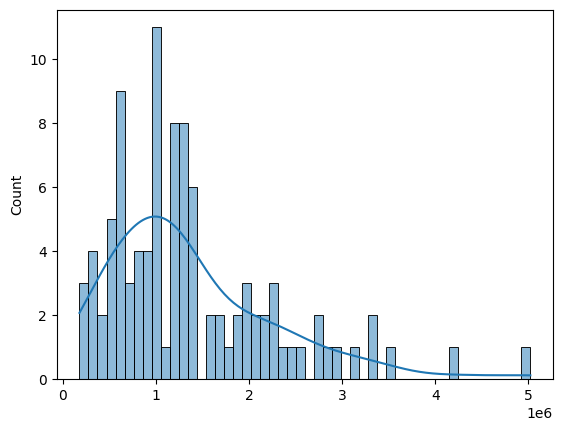

In [135]:
sns.histplot((pred),bins=50,kde=True)

##Regression

In [136]:
X = data1_latent.drop(['address','property_id', 'zestimate', 'price'], axis=1)
y = data1_latent['price']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [138]:
clf = GradientBoostingRegressor(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("R2 Score:",100.0 * clf.score(X_test, y_test))

R2 Score: 82.3714271442071


In [139]:
pickle.dump(clf, open('gradientBoostingRegressor.pkl', 'wb'))

### Loading Saved Model

The model takes the following inputs - 'rank', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'area',
       'rent_zestimate', 'days_on_zillow', 'NatWalkInd', 'D2B_E8MIXA',
       'R_PCTLOWWAGE', 'hoa'

In [140]:
reg_model_link = 'https://drive.google.com/file/d/1uxKIQ7w18nf6SLpkGyzrtjYuABSQs4qL/view?usp=drive_link'
id6 = reg_model_link.split("/")[-2]

downloaded6 = drive.CreateFile({'id':id6})
downloaded6.GetContentFile('gradientBoostingRegressor.pkl')

In [141]:
pickled_clf = pickle.load(open('gradientBoostingRegressor.pkl', 'rb'))
pred = pickled_clf.predict(X_test)

<Axes: ylabel='Count'>

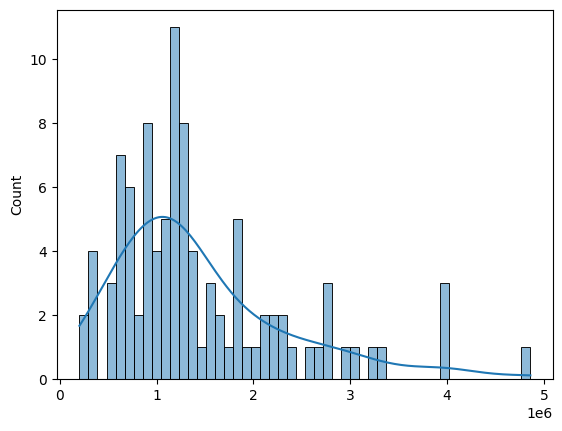

In [142]:
sns.histplot((pred),bins=50,kde=True)